In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, MultinomialNB
from mixed_naive_bayes import MixedNB
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('Obesity based on eating habits & physical cond\ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
data.info()    #to see if there is missing data in the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
#another way to check MV
print(data.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [4]:
data.isnull()          #if thereis no missing value, then it returns false

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#for checking if there is categorical data
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
   print( data['Gender'].unique())
   print(data['family_history_with_overweight'].unique())
   print (data['FAVC'].unique())
   print(data['CAEC'].unique())
   print(data['SMOKE'].unique())
   print(data['SCC'].unique())
   print(data['CALC'].unique())
   print(data['MTRANS'].unique())
   print(data['NObeyesdad'].unique())
   
 #to show unique values of features of data type object

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [7]:
data_encoded=data.replace({
        'Gender':{'Male':0,'Female':1},
        'family_history_with_overweight':{'no':0,'yes':1},
        'FAVC':{'no':0,'yes':1},
        'CAEC':{'Sometimes':0,'Frequently':1,'Always':2,'no':3},
        'SMOKE':{'no':0,'yes':1},
        'SCC':{'no':0,'yes':1},
        'CALC':{'Sometimes':0,'Frequently':1,'Always':2,'no':3},
        'MTRANS':{'Public_Transportation':0, 'Walking':1, 'Automobile':2, 'Motorbike':3,'Bike':4},
        'NObeyesdad':{'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,
                    'Obesity_Type_I':3, 'Insufficient_Weight':4, 'Obesity_Type_II':5,'Obesity_Type_III':6 }           
})

In [8]:
data_encoded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,3,0,0
1,1,21.0,1.52,56.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,0,0,0
2,0,23.0,1.80,77.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,1,0,0
3,0,27.0,1.80,87.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,1,1
4,0,22.0,1.78,89.8,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,0,0,2


In [9]:
X = data_encoded.drop(columns=['NObeyesdad'])
y = data_encoded['NObeyesdad']
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X , y , test_size=0.22, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.22, random_state=0)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1283, 16)
y_train: (1283,)
------------------------
X_val: (363, 16)
y_val: (363,)
------------------------
X_test: (465, 16)
y_test: (465,)


In [10]:

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return (acc_train, acc_val)

In [11]:
# import classifier
from sklearn.naive_bayes import CategoricalNB
model1 =  CategoricalNB()
acc_train1, acc_val1 = evaluate_model(model1, X_train, y_train, X_val, y_val)
print(acc_train1)
print(acc_val1)

0.7669524551831645
0.7465564738292011


In [12]:
model2 = GaussianNB()
acc_train2, acc_val2 = evaluate_model(model2, X_train, y_train, X_val, y_val)
print(acc_train2)
print(acc_val2)

0.5401402961808262
0.5482093663911846


In [13]:
model3 = MixedNB(categorical_features=[0, 4,5,8,9,11,14,15])
acc_train3, acc_val3 = evaluate_model(model3, X_train, y_train, X_val, y_val)
print(acc_train3)
print(acc_val3)

[2 2 2 4 2 2 4 5]
0.6656274356975838
0.6694214876033058


In [14]:
model4 = ComplementNB()
acc_train4, acc_val4 = evaluate_model(model4, X_train, y_train, X_val, y_val)
print(acc_train4)
print(acc_val4)

0.4240062353858145
0.3774104683195592


In [15]:
model5 = BernoulliNB()
acc_train5, acc_val5 = evaluate_model(model5, X_train, y_train, X_val, y_val)
print(acc_train5)
print(acc_val5)

0.5120810600155885
0.48484848484848486


In [16]:
model6 = MultinomialNB()
acc_train6, acc_val6 = evaluate_model(model6, X_train, y_train, X_val, y_val)
print(acc_train6)
print(acc_val6)

0.5003897116134061
0.49586776859504134


In [17]:
results = pd.DataFrame({
    'model': ['CategoricalNB','GaussianNB','MixedNB', 'ComplementNB', 'BernoulliNB', 'MultinomialNB'],
    'acc_train': [acc_train1, acc_train2, acc_train3, acc_train4, acc_train5, acc_train6],
    'acc_val': [acc_val1, acc_val2, acc_val3, acc_val4, acc_val5, acc_val6],
})

results

,model,acc_train,acc_val
0,CategoricalNB,0.766952,0.746556
1,GaussianNB,0.540140,0.548209
2,MixedNB,0.665627,0.669421
3,ComplementNB,0.424006,0.377410
4,BernoulliNB,0.512081,0.484848
5,MultinomialNB,0.500390,0.495868


<AxesSubplot:xlabel='model'>

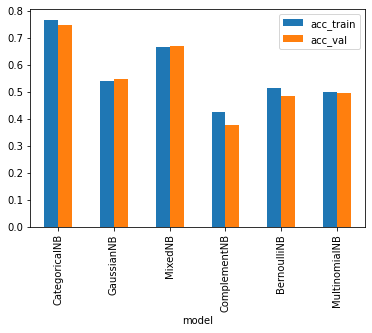

In [18]:
results.plot.bar(x='model', y=['acc_train', 'acc_val'])

In [19]:
model_best = CategoricalNB()
model_best.fit(X_train, y_train)
y_pred_test = model_best.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.7139784946236559
